In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
idx = pd.IndexSlice

# Chronological mapping of the models
model_year_map = {
    'iPhone X': 2017,
    'iPhone XS': 2018,
    'iPhone XS Max': 2018,
    'iPhone XR': 2018,
    'iPhone 11': 2019,
    'iPhone 11 Pro': 2019,
    'iPhone 11 Pro Max': 2019,
    'iPhone 12 mini': 2020,
    'iPhone 12': 2020,
    'iPhone 12 Pro': 2020,
    'iPhone 12 Pro Max': 2020,
    'iPhone 13 mini': 2021,
    'iPhone 13': 2021,
    'iPhone 13 Pro': 2021,
    'iPhone 13 Pro Max': 2021,
    'iPhone 14': 2022,
    'iPhone 14 Plus': 2022,
    'iPhone 14 Pro': 2022,
    'iPhone 14 Pro Max': 2022,
    'iPhone 15': 2023,
    'iPhone 15 Plus': 2023,
    'iPhone 15 Pro': 2023,
    'iPhone 15 Pro Max': 2023,
    'iPhone 16': 2024,
    'iPhone 16 Plus': 2024,
    'iPhone 16 Pro': 2024,
    'iPhone 16 Pro Max': 2024
}

In [127]:
# Define the data from your image (Model: {ROM: Price})
msrp_data = {
    'iPhone X': {'64GB': 8388, '256GB': 9688},
    'iPhone XS': {'64GB': 8699, '256GB': 9999, '512GB': 11299},
    'iPhone XS Max': {'64GB': 9599, '256GB': 10899, '512GB': 12199},
    'iPhone XR': {'64GB': 6499, '256GB': 6999},
    'iPhone 11': {'64GB': 5499, '128GB': 5999, '256GB': 6799},
    'iPhone 11 Pro': {'64GB': 8699, '256GB': 9999, '512GB': 11299},
    'iPhone 11 Pro Max': {'64GB': 9599, '256GB': 10899, '512GB': 12199},
    'iPhone 12 mini': {'64GB': 5499, '128GB': 5999, '256GB': 6799},
    'iPhone 12': {'64GB': 6299, '128GB': 6799, '256GB': 7599},
    'iPhone 12 Pro': {'128GB': 8499, '256GB': 9299, '512GB': 11099},
    'iPhone 12 Pro Max': {'128GB': 9299, '256GB': 10099, '512GB': 11899},
    'iPhone 13 mini': {'128GB': 5199, '256GB': 5999, '512GB': 7599},
    'iPhone 13': {'128GB': 5999, '256GB': 6799, '512GB': 8399},
    'iPhone 13 Pro': {'128GB': 7999, '256GB': 8799, '512GB': 10399, '1TB': 11999},
    'iPhone 13 Pro Max': {'128GB': 8999, '256GB': 9799, '512GB': 11399, '1TB': 12999},
    'iPhone 14': {'128GB': 5999, '256GB': 6899, '512GB': 8699},
    'iPhone 14 Plus': {'128GB': 6999, '256GB': 7899, '512GB': 9699},
    'iPhone 14 Pro': {'128GB': 7999, '256GB': 8899, '512GB': 10699, '1TB': 12499},
    'iPhone 14 Pro Max': {'128GB': 8999, '256GB': 9899, '512GB': 11699, '1TB': 13499},
    'iPhone 15': {'128GB': 5999, '256GB': 6999, '512GB': 8999},
    'iPhone 15 Plus': {'128GB': 6999, '256GB': 7999, '512GB': 9999},
    'iPhone 15 Pro': {'128GB': 7999, '256GB': 8999, '512GB': 10999, '1TB': 12999},
    'iPhone 15 Pro Max': {'256GB': 9999, '512GB': 11999, '1TB': 13999},
    'iPhone 16': {'128GB': 5999, '256GB': 6999, '512GB': 8999},
    'iPhone 16 Plus': {'128GB': 6999, '256GB': 7999, '512GB': 9999},
    'iPhone 16 Pro': {'128GB': 7999, '256GB': 8999, '512GB': 10999, '1TB': 12999},
    'iPhone 16 Pro Max': {'256GB': 9999, '512GB': 11999, '1TB': 13999}
}

# Convert dictionary to a flat list of tuples for MultiIndex
index_data = []
prices = []

for model, storage_prices in msrp_data.items():
    for rom, price in storage_prices.items():
        index_data.append((model, rom))
        prices.append(price)

# Create the MultiIndex
index = pd.MultiIndex.from_tuples(index_data, names=['Model', 'ROM'])

# Final MSRP DataFrame
df_msrp = pd.DataFrame(prices, index=index, columns=['MSRP'])


In [128]:
# Define models and their corresponding available storage capacities from the image
# This follows the structure: 'Model': ['Capacity1', 'Capacity2', ...]
data_map = {
    'iPhone X': ['64GB', '256GB'],
    'iPhone XS Max': ['64GB', '256GB', '512GB'],
    'iPhone XS': ['64GB', '256GB', '512GB'],
    'iPhone XR': ['64GB', '256GB'],
    'iPhone 11': ['64GB', '128GB', '256GB'],
    'iPhone 11 Pro': ['64GB', '256GB', '512GB'],
    'iPhone 11 Pro Max': ['64GB', '256GB', '512GB'],
    'iPhone 12 mini': ['64GB', '128GB', '256GB'],
    'iPhone 12': ['64GB', '128GB', '256GB'],
    'iPhone 12 Pro': ['128GB', '256GB', '512GB'],
    'iPhone 12 Pro Max': ['128GB', '256GB', '512GB'],
    'iPhone 13 mini': ['128GB', '256GB', '512GB'],
    'iPhone 13': ['128GB', '256GB', '512GB'],
    'iPhone 13 Pro': ['128GB', '256GB', '512GB', '1TB'],
    'iPhone 13 Pro Max': ['128GB', '256GB', '512GB', '1TB'],
    'iPhone 14': ['128GB', '256GB', '512GB'],
    'iPhone 14 Plus': ['128GB', '256GB', '512GB'],
    'iPhone 14 Pro': ['128GB', '256GB', '512GB', '1TB'],
    'iPhone 14 Pro Max': ['128GB', '256GB', '512GB', '1TB'],
    'iPhone 15': ['128GB', '256GB', '512GB'],
    'iPhone 15 Plus': ['128GB', '256GB', '512GB'],
    'iPhone 15 Pro': ['128GB', '256GB', '512GB', '1TB'],
    'iPhone 15 Pro Max': ['256GB', '512GB', '1TB'],
    'iPhone 16': ['128GB', '256GB', '512GB'],
    'iPhone 16 Plus': ['128GB', '256GB', '512GB'],
    'iPhone 16 Pro': ['128GB', '256GB', '512GB', '1TB'],
    'iPhone 16 Pro Max': ['256GB', '512GB', '1TB']
}

# Generate the tuples automatically
index_tuples = []
for model, capacities in data_map.items():
    for cap in capacities:
        index_tuples.append((model, cap))

# Create the MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['Model', 'ROM'])

# Define Multi-Index Columns: (Category, Target Model)
columns = pd.MultiIndex.from_product(
    [['Trade-in', 'Rebate'], ['iPhone 17', 'iPhone 17 Pro', 'iPhone 17 Pro Max']],
    names=['Type', 'Target']
)

# Create the master DataFrame
df_master = pd.DataFrame(np.nan, index=index, columns=columns)

# print(df_master.loc[('iPhone 15 Pro', '128GB'), ('Trade-in', 'iPhone 17')])
# print(df_master.loc[idx['iPhone 15 Pro', '128GB'], idx['Trade-in', 'iPhone 17']])

df_master.loc[idx['iPhone X', '64GB'], idx['Trade-in']] = 453
df_master.loc[idx['iPhone X', '64GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 580
df_master.loc[idx['iPhone X', '256GB'], idx['Trade-in']] = 574
df_master.loc[idx['iPhone X', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650

df_master.loc[idx['iPhone XR', '64GB'], idx['Trade-in']] = 427
df_master.loc[idx['iPhone XR', '64GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 580
df_master.loc[idx['iPhone XR', '256GB'], idx['Trade-in']] = 555
df_master.loc[idx['iPhone XR', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650

df_master.loc[idx['iPhone XS', '64GB'], idx['Trade-in']] = 413
df_master.loc[idx['iPhone XS', '64GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 580
df_master.loc[idx['iPhone XS', '256GB'], idx['Trade-in']] = 504
df_master.loc[idx['iPhone XS', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650
df_master.loc[idx['iPhone XS', '512GB'], idx['Trade-in']] = 577
df_master.loc[idx['iPhone XS', '512GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650

df_master.loc[idx['iPhone XS Max', '64GB'], idx['Trade-in']] = 485
df_master.loc[idx['iPhone XS Max', '64GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 580
df_master.loc[idx['iPhone XS Max', '256GB'], idx['Trade-in']] = 655
df_master.loc[idx['iPhone XS Max', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650
df_master.loc[idx['iPhone XS Max', '512GB'], idx['Trade-in']] = 727
df_master.loc[idx['iPhone XS Max', '512GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650

df_master.loc[idx['iPhone 11', '64GB'], idx['Trade-in']] = 578
df_master.loc[idx['iPhone 11', '64GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650
df_master.loc[idx['iPhone 11', '128GB'], idx['Trade-in']] = 647
df_master.loc[idx['iPhone 11', '128GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650
df_master.loc[idx['iPhone 11', '256GB'], idx['Trade-in']] = 704
df_master.loc[idx['iPhone 11', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650

df_master.loc[idx['iPhone 11 Pro', '64GB'], idx['Trade-in']] = 849
df_master.loc[idx['iPhone 11 Pro', '64GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650
df_master.loc[idx['iPhone 11 Pro', '256GB'], idx['Trade-in']] = 934
df_master.loc[idx['iPhone 11 Pro', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650
df_master.loc[idx['iPhone 11 Pro', '512GB'], idx['Trade-in']] = 1019
df_master.loc[idx['iPhone 11 Pro', '512GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 11 Pro Max', '64GB'], idx['Trade-in']] = 893
df_master.loc[idx['iPhone 11 Pro Max', '64GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650
df_master.loc[idx['iPhone 11 Pro Max', '256GB'], idx['Trade-in']] = 983
df_master.loc[idx['iPhone 11 Pro Max', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 650
df_master.loc[idx['iPhone 11 Pro Max', '512GB'], idx['Trade-in']] = 1072
df_master.loc[idx['iPhone 11 Pro Max', '512GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 12 mini', '64GB'], idx['Trade-in']] = 618
df_master.loc[idx['iPhone 12 mini', '128GB'], idx['Trade-in']] = 674
df_master.loc[idx['iPhone 12 mini', '256GB'], idx['Trade-in']] = 816
df_master.loc[idx['iPhone 12 mini'], idx['Rebate', 'iPhone 17 Pro Max']] = 650

df_master.loc[idx['iPhone 12', '64GB'], idx['Trade-in']] = 730
df_master.loc[idx['iPhone 12', '128GB'], idx['Trade-in']] = 797
df_master.loc[idx['iPhone 12', '256GB'], idx['Trade-in']] = 847
df_master.loc[idx['iPhone 12'], idx['Rebate', 'iPhone 17 Pro Max']] = 650

df_master.loc[idx['iPhone 12 Pro', '128GB'], idx['Trade-in']] = 1001
df_master.loc[idx['iPhone 12 Pro', '256GB'], idx['Trade-in']] = 1082
df_master.loc[idx['iPhone 12 Pro', '512GB'], idx['Trade-in']] = 1152
df_master.loc[idx['iPhone 12 Pro'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 12 Pro Max', '128GB'], idx['Trade-in']] = 1282
df_master.loc[idx['iPhone 12 Pro Max', '256GB'], idx['Trade-in']] = 1385
df_master.loc[idx['iPhone 12 Pro Max', '512GB'], idx['Trade-in']] = 1436
df_master.loc[idx['iPhone 12 Pro Max'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 13 mini', '128GB'], idx['Trade-in']] = 1024
df_master.loc[idx['iPhone 13 mini', '256GB'], idx['Trade-in']] = 1147
df_master.loc[idx['iPhone 13 mini', '512GB'], idx['Trade-in']] = 1330
df_master.loc[idx['iPhone 13 mini'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 13', '128GB'], idx['Trade-in']] = 1061
df_master.loc[idx['iPhone 13', '256GB'], idx['Trade-in']] = 1114
df_master.loc[idx['iPhone 13', '512GB'], idx['Trade-in']] = 1326
df_master.loc[idx['iPhone 13'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 13 Pro', '128GB'], idx['Trade-in']] = 1497
df_master.loc[idx['iPhone 13 Pro', '256GB'], idx['Trade-in']] = 1616
df_master.loc[idx['iPhone 13 Pro', '512GB'], idx['Trade-in']] = 1722
df_master.loc[idx['iPhone 13 Pro', '1TB'], idx['Trade-in']] = 1946
df_master.loc[idx['iPhone 13 Pro'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 13 Pro Max', '128GB'], idx['Trade-in']] = 1816
df_master.loc[idx['iPhone 13 Pro Max', '256GB'], idx['Trade-in']] = 1962
df_master.loc[idx['iPhone 13 Pro Max', '512GB'], idx['Trade-in']] = 2090
df_master.loc[idx['iPhone 13 Pro Max', '1TB'], idx['Trade-in']] = 2361
df_master.loc[idx['iPhone 13 Pro Max', '128GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 770
df_master.loc[idx['iPhone 13 Pro Max', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 770
df_master.loc[idx['iPhone 13 Pro Max', '512GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900
df_master.loc[idx['iPhone 13 Pro Max', '1TB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900

df_master.loc[idx['iPhone 14', '128GB'], idx['Trade-in']] = 1264
df_master.loc[idx['iPhone 14', '256GB'], idx['Trade-in']] = 1366
df_master.loc[idx['iPhone 14', '512GB'], idx['Trade-in']] = 1656
df_master.loc[idx['iPhone 14'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 14 Plus', '128GB'], idx['Trade-in']] = 1475
df_master.loc[idx['iPhone 14 Plus', '256GB'], idx['Trade-in']] = 1623
df_master.loc[idx['iPhone 14 Plus', '512GB'], idx['Trade-in']] = 1888
df_master.loc[idx['iPhone 14 Plus'], idx['Rebate', 'iPhone 17 Pro Max']] = 770

df_master.loc[idx['iPhone 14 Pro', '128GB'], idx['Trade-in']] = 2036
df_master.loc[idx['iPhone 14 Pro', '256GB'], idx['Trade-in']] = 2138
df_master.loc[idx['iPhone 14 Pro', '512GB'], idx['Trade-in']] = 2423
df_master.loc[idx['iPhone 14 Pro', '1TB'], idx['Trade-in']] = 2749
df_master.loc[idx['iPhone 14 Pro'], idx['Rebate', 'iPhone 17 Pro Max']] = 900

df_master.loc[idx['iPhone 14 Pro Max', '128GB'], idx['Trade-in']] = 2404
df_master.loc[idx['iPhone 14 Pro Max', '256GB'], idx['Trade-in']] = 2501
df_master.loc[idx['iPhone 14 Pro Max', '512GB'], idx['Trade-in']] = 2717
df_master.loc[idx['iPhone 14 Pro Max', '1TB'], idx['Trade-in']] = 3078
df_master.loc[idx['iPhone 14 Pro Max'], idx['Rebate', 'iPhone 17 Pro Max']] = 900

df_master.loc[idx['iPhone 15', '128GB'], idx['Trade-in']] = 1876
df_master.loc[idx['iPhone 15', '256GB'], idx['Trade-in']] = 2083
df_master.loc[idx['iPhone 15', '512GB'], idx['Trade-in']] = 2439
df_master.loc[idx['iPhone 15', '128GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 770
df_master.loc[idx['iPhone 15', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900
df_master.loc[idx['iPhone 15', '512GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900

df_master.loc[idx['iPhone 15 Plus', '128GB'], idx['Trade-in']] = 1989
df_master.loc[idx['iPhone 15 Plus', '256GB'], idx['Trade-in']] = 2128
df_master.loc[idx['iPhone 15 Plus', '512GB'], idx['Trade-in']] = 2507
df_master.loc[idx['iPhone 15 Plus', '128GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 770
df_master.loc[idx['iPhone 15 Plus', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900
df_master.loc[idx['iPhone 15 Plus', '512GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900

df_master.loc[idx['iPhone 15 Pro', '128GB'], idx['Trade-in']] = 2873
df_master.loc[idx['iPhone 15 Pro', '256GB'], idx['Trade-in']] = 3103
df_master.loc[idx['iPhone 15 Pro', '512GB'], idx['Trade-in']] = 3248
df_master.loc[idx['iPhone 15 Pro', '1TB'], idx['Trade-in']] = 3448
df_master.loc[idx['iPhone 15 Pro'], idx['Rebate', 'iPhone 17 Pro Max']] = 900

df_master.loc[idx['iPhone 15 Pro Max', '256GB'], idx['Trade-in']] = 3538
df_master.loc[idx['iPhone 15 Pro Max', '512GB'], idx['Trade-in']] = 3821
df_master.loc[idx['iPhone 15 Pro Max', '1TB'], idx['Trade-in']] = 3928
df_master.loc[idx['iPhone 15 Pro Max'], idx['Rebate', 'iPhone 17 Pro Max']] = 980

df_master.loc[idx['iPhone 16', '128GB'], idx['Trade-in']] = 2378
df_master.loc[idx['iPhone 16', '256GB'], idx['Trade-in']] = 2735
df_master.loc[idx['iPhone 16', '512GB'], idx['Trade-in']] = 3234
df_master.loc[idx['iPhone 16'], idx['Rebate', 'iPhone 17 Pro Max']] = 900

df_master.loc[idx['iPhone 16 Plus', '128GB'], idx['Trade-in']] = 2708
df_master.loc[idx['iPhone 16 Plus', '256GB'], idx['Trade-in']] = 3115
df_master.loc[idx['iPhone 16 Plus', '512GB'], idx['Trade-in']] = 3602
df_master.loc[idx['iPhone 16 Plus', '128GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900
df_master.loc[idx['iPhone 16 Plus', '256GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900
df_master.loc[idx['iPhone 16 Plus', '512GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 980

df_master.loc[idx['iPhone 16 Pro', '128GB'], idx['Trade-in']] = 3403
df_master.loc[idx['iPhone 16 Pro', '256GB'], idx['Trade-in']] = 3710
df_master.loc[idx['iPhone 16 Pro', '512GB'], idx['Trade-in']] = 4187
df_master.loc[idx['iPhone 16 Pro', '1TB'], idx['Trade-in']] = 4527
df_master.loc[idx['iPhone 16 Pro'], idx['Rebate', 'iPhone 17 Pro Max']] = 980
df_master.loc[idx['iPhone 16 Pro', '128GB'], idx['Rebate', 'iPhone 17 Pro Max']] = 900

df_master.loc[idx['iPhone 16 Pro Max', '256GB'], idx['Trade-in']] = 4562
df_master.loc[idx['iPhone 16 Pro Max', '512GB'], idx['Trade-in']] = 4883
df_master.loc[idx['iPhone 16 Pro Max', '1TB'], idx['Trade-in']] = 5156
df_master.loc[idx['iPhone 16 Pro Max'], idx['Rebate', 'iPhone 17 Pro Max']] = 980
df_master.loc[idx['iPhone 16 Pro Max', '1TB'], idx['Rebate', 'iPhone 17 Pro Max']] = 1050

df_master.loc[idx['iPhone X', '64GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 80
df_master.loc[idx['iPhone X', '256GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150

df_master.loc[idx['iPhone XR', '64GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 80
df_master.loc[idx['iPhone XR', '256GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150

df_master.loc[idx['iPhone XS'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150
df_master.loc[idx['iPhone XS', '64GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 80

df_master.loc[idx['iPhone XS Max'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150
df_master.loc[idx['iPhone XS Max', '64GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 80

df_master.loc[idx['iPhone 11'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150

df_master.loc[idx['iPhone 11 Pro'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150
df_master.loc[idx['iPhone 11 Pro', '512GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270

df_master.loc[idx['iPhone 11 Pro Max'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150
df_master.loc[idx['iPhone 11 Pro Max', '512GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270

df_master.loc[idx['iPhone 12 mini'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150
df_master.loc[idx['iPhone 12'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 150
df_master.loc[idx['iPhone 12 Pro'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 12 Pro Max'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270

df_master.loc[idx['iPhone 13 mini'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 13'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 13 Pro'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 13 Pro Max'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 13 Pro Max', '512GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400
df_master.loc[idx['iPhone 13 Pro Max', '1TB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400

df_master.loc[idx['iPhone 14'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 14 Plus'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 14 Pro'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400
df_master.loc[idx['iPhone 14 Pro Max'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400

df_master.loc[idx['iPhone 15'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 15 Plus'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400
df_master.loc[idx['iPhone 15 Plus', '128GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 270
df_master.loc[idx['iPhone 15 Pro'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400
df_master.loc[idx['iPhone 15 Pro Max'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400

df_master.loc[idx['iPhone 16'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400
df_master.loc[idx['iPhone 16 Plus'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400
df_master.loc[idx['iPhone 16 Pro'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 480
df_master.loc[idx['iPhone 16 Pro', '128GB'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 400
df_master.loc[idx['iPhone 16 Pro Max'], idx['Rebate', ['iPhone 17', 'iPhone 17 Pro']]] = 480

print(df_master.loc[idx['iPhone XS Max', '64GB'], idx['Rebate', 'iPhone 17']])
print(df_msrp.loc[idx['iPhone 15 Pro', '128GB'], 'MSRP'])

80.0
7999


We construct a cost function that contains two parts: The first part is the depreciation per year, and the second part is the ROM requirement.
1. Determine the depreciation per year (DeP): DeP = (MSRP-Rebate-Trade_In)/(2026-Model_Year)
2. ROM requirement as boundary condition: ROM_of_the_model - ROM_req > 0

For now, let's not consider ROM requirement, but only the depreciation. In this case, we are assuming even an iPhone X with 64GB ROM can still run. Later we will take that into account. 

Indices aligned: True
Target               iPhone 17  iPhone 17 Pro  iPhone 17 Pro Max
Model         ROM                                               
iPhone 11     128GB     5202.0         5202.0             4702.0
              256GB     5945.0         5945.0             5445.0
              64GB      4771.0         4771.0             4271.0
iPhone 11 Pro 256GB     8915.0         8915.0             8415.0
              512GB    10010.0        10010.0             9510.0
Years and models match!
Target
iPhone 17            1548.666667
iPhone 17 Pro        1548.666667
iPhone 17 Pro Max    1338.666667
Name: (iPhone 15, 256GB), dtype: float64


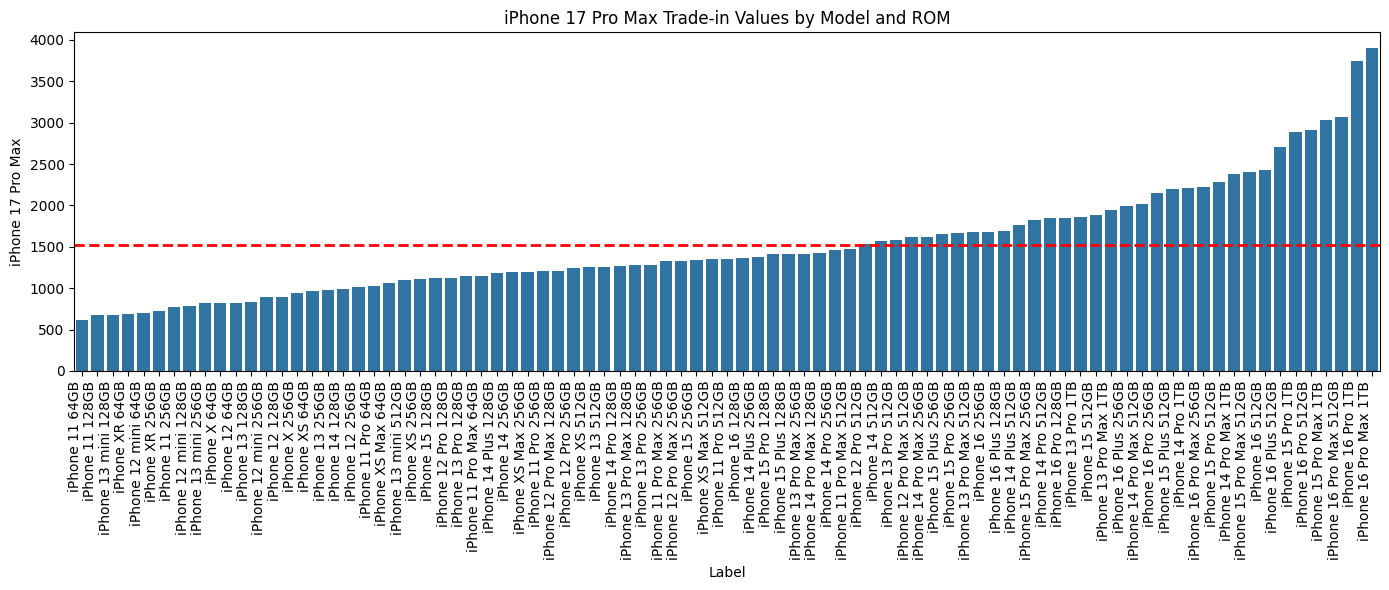

In [ ]:
df_det_tot = df_master['Trade-in'] + df_master['Rebate']
df_det_tot = df_det_tot.sort_index()
df_msrp = df_msrp.sort_index()

# Check if two dataframes are aligned
is_aligned = df_det_tot.index.equals(df_msrp.index)
print(f"Indices aligned: {is_aligned}")

if not is_aligned:
    # Find coordinates (row index, column index) of NAs
    rows, cols = np.where(df_det_tot.isna())
    # Print the Model, ROM, and the specific Column name for each NA
    for r, c in zip(rows, cols):
        print(f"Missing data at: {df_det_tot.index[r]} | Column: {df_det_tot.columns[c]}")
else:
    # Calculate the total depreciation value
    df_val_dep = -df_det_tot.sub(df_msrp.iloc[:,0], axis=0)
# print(df_val_dep.head(5))

# Construct the cost function using depreciation only
new_index = df_msrp.index 
years = new_index.get_level_values('Model').map(model_year_map).values # Extract the 'Model' level and map the year
df_years = pd.DataFrame(years, index=new_index, columns=['Model_Year']) # Create the DataFrame
df_years = df_years.sort_index()  # Sort to match other DataFrame
# Safety check:
is_aligned_yrs = df_years.index.equals(df_val_dep.index)
if not is_aligned_yrs:
    print('Two dataframes are not aligned')
else:
    print('Years and models match!')

df_years['Age'] = 2026 - df_years['Model_Year']
# print(df_years.head(10))

df_dep_nor = df_val_dep.div(df_years['Age'], axis=0)
# print(df_dep_nor.head(10))

sort_quant = 'iPhone 17 Pro Max'
df_dep_sort = df_dep_nor.sort_values(by=sort_quant)
print(df_dep_sort.loc[idx['iPhone 15', '256GB']])

plot_df = df_dep_sort.copy()
plot_df['Label'] = [f"{m} {r}" for m,r in plot_df.index]
plt.figure(figsize=(14,6))
sns.barplot(data=plot_df, x='Label', y=sort_quant)
plt.xticks(rotation=90, ha='right')
plt.axhline(plot_df[sort_quant].mean(), color='red', linestyle='--', linewidth=2, label='Mean Depreciation Per Year')
plt.title(f'{sort_quant} Trade-in Values by Model and ROM')
plt.tight_layout()
plt.show()
